In this section, we will setup all the computing environment to allow you to run the analyses needed for this part.

Acknowledgements to the creators of the Seurat and Signac packages for the content and packages we will be introducing today, as well as to David Fischer for frameworks for creating this notebook

In [1]:
# Runtime --> Change runtime type -> R
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

## Setup R2U
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

172 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
wget is already the newest version (1.21.2-2ubuntu1).
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
The following package was automatically installed and is no longer required:
  r-cran-svglite
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 172 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3

Tracing function "install.packages" in package "utils"



In [2]:
# Install the R packages
system("sudo apt install libgsl-dev")
system("sudo apt-get install libhdf5-dev")  # for hdf5r
cranPkgs2Install = c("BiocManager", "ggraph", "ggplot2", "clustree", "hdf5r")
install.packages(cranPkgs2Install, ask=FALSE, update=TRUE, quietly=FALSE)
BiocManager::install("scRepertoire")
install.packages('Seurat')
BiocManager::install("TFBSTools")
BiocManager::install("JASPAR2020")
BiocManager::install("scater")
BiocManager::install("scDblFinder")
BiocManager::install("celldex")
BiocManager::install("SingleR")
BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db")
BiocManager::install("EnsDb.Hsapiens.v75")
BiocManager::install("BSgenome.Hsapiens.UCSC.hg19")
BiocManager::install("biovizBase")
BiocManager::install("motifmatchr")
BiocManager::install("chromVAR")
devtools::install_github('immunogenomics/presto')
setRepositories(ind=1:3) # needed to automatically install Bioconductor dependencies
install.packages("Signac")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'scRepertoire'”
Old packages: 'alabaster.matrix', 'alabaster.ranges', 'alabaster.se',
  'backports', 'bit', 'brio', 'broom', 'bslib', 'cachem', 'callr', 'crayon',
  'curl', 'DBI', 'dbplyr', 'devtools', 'digest', 'DOSE', 'evaluate', 'farver',
  'fastmap', 'fs', 'gargle', 'GenomeInfoDb', 'GenomicRanges', 'gh', 'gtable',
  'highr', 'htmltools', 'httr2', 'isoband', 'KEGGREST', 'knitr', 'limma',
  'munsell', 'openssl', 'pkgbuild', 'processx', 'ragg', 'remotes', 'rmarkdown',
  'rstudioapi', 'rvest', 'S4Arrays', 'sass', 'SparseArray', 'systemfonts',
  'testthat', 'textshaping', 'tinytex', 'usethis', 'whisker

Then, load the libraries that you previously installed.



*   Rtsne: Input data matrix for visualization
*   Seurat: Seurat is an R package designed for QC, analysis, and exploration of single cell RNA-seq data.
*   Signac: Signac is an R package designed for QC, analysis, and exploration of single cell ATAC-seq and multi-omic data.
*   scDblFinder: The scDblFinder package gathers various methods for the detection and handling of doublets/multiplets in single-cell sequencing data (i.e. multiple cells captured within the same droplet or reaction volume)
*   ggplot2: plotting
*   Cowplot: Provides various features that help with creating publication-quality figures with ggplot2, such as a set of themes, functions to align plots and arrange them into complex compound figures, and functions that make it easy to annotate plots and or mix plots with images.
*   clustree: This visualization shows the relationships between clusters at multiple resolutions, allowing researchers to see how samples move as the number of clusters increases.
*  PreprocessCore: A collection of pre-processing functions







In [3]:
## To simplify package loading, we created the loadPackages()
## function. But, if you don't have the function, you should
## use 'library(name_of_package)'
pkgs = c("Rtsne", "Seurat", "tidyverse", "cowplot", "ggplot2", "Signac",
         "scDblFinder", "clustree", "preprocessCore",
         "EnsDb.Hsapiens.v75",
         "BSgenome.Hsapiens.UCSC.hg19", "EnsDb.Hsapiens.v75",
         "patchwork", "TFBSTools", "JASPAR2020",
         "motifmatchr", "chromVAR",
         "clusterProfiler", "celldex")
loadPackages(pkgs)

‘SeuratObject’ was built under R 4.4.0 but the current version is
4.4.1; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



A

Then, load the libraries that you previously installed.

*   Rtsne: Input input data matrix
*   Seurat: Seurat is an R package designed for QC, analysis, and exploration of single cell RNA-seq data.
*   scDblFinder: The scDblFinder package gathers various methods for the detection and handling of doublets/multiplets in single-cell sequencing data (i.e. multiple cells captured within the same droplet or reaction volume)
*   Cowplot: Provides various features that help with creating publication-quality figures with ggplot2, such as a set of themes, functions to align plots and arrange them into complex compound figures, and functions that make it easy to annotate plots and or mix plots with images.
*   clustree: This visualization shows the relationships between clusters at multiple resolutions, allowing researchers to see how samples move as the number of clusters increases.
*   PreprocessCore: A collection of pre-processing functions





In [4]:
# Download the data files we'll need
shell_call("wget https://cf.10xgenomics.com/samples/cell-atac/1.0.1/atac_v1_pbmc_10k/atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5")
shell_call("wget https://cf.10xgenomics.com/samples/cell-atac/1.0.1/atac_v1_pbmc_10k/atac_v1_pbmc_10k_singlecell.csv")
shell_call("wget https://cf.10xgenomics.com/samples/cell-atac/1.0.1/atac_v1_pbmc_10k/atac_v1_pbmc_10k_fragments.tsv.gz")
shell_call("wget https://cf.10xgenomics.com/samples/cell-atac/1.0.1/atac_v1_pbmc_10k/atac_v1_pbmc_10k_fragments.tsv.gz.tbi")

In [5]:
list.files()

[1] "atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5"  
 [2] "atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5.1"
 [3] "atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5.2"
 [4] "atac_v1_pbmc_10k_fragments.tsv.gz"            
 [5] "atac_v1_pbmc_10k_fragments.tsv.gz.1"          
 [6] "atac_v1_pbmc_10k_fragments.tsv.gz.2"          
 [7] "atac_v1_pbmc_10k_fragments.tsv.gz.tbi"        
 [8] "atac_v1_pbmc_10k_fragments.tsv.gz.tbi.1"      
 [9] "atac_v1_pbmc_10k_fragments.tsv.gz.tbi.2"      
[10] "atac_v1_pbmc_10k_singlecell.csv"              
[11] "atac_v1_pbmc_10k_singlecell.csv.1"            
[12] "atac_v1_pbmc_10k_singlecell.csv.2"            
[13] "sample_data"

Pre-processing workflow
When pre-processing chromatin data, Signac uses information from two related input files, both of which can be created using CellRanger:

Peak/Cell matrix. This is analogous to the gene expression count matrix used to analyze single-cell RNA-seq. However, instead of genes, each row of the matrix represents a region of the genome (a peak), that is predicted to represent a region of open chromatin. Each value in the matrix represents the number of Tn5 integration sites for each single barcode (i.e. a cell) that map within each peak. You can find more detail on the 10X Website.

Fragment file. This represents a full list of all unique fragments across all single cells. It is a substantially larger file, is slower to work with, and is stored on-disk (instead of in memory). However, the advantage of retaining this file is that it contains all fragments associated with each single cell, as opposed to only fragments that map to peaks. More information about the fragment file can be found on the 10x Genomics website or on the sinto website.

We start by creating a Seurat object using the peak/cell matrix and cell metadata generated by cellranger-atac, and store the path to the fragment file on disk in the Seurat object:

In [6]:
counts <- Read10X_h5(filename = "atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5")
metadata <- read.csv(
  file = "atac_v1_pbmc_10k_singlecell.csv",
  header = TRUE,
  row.names = 1
)

chrom_assay <- CreateChromatinAssay(
  counts = counts,
  sep = c(":", "-"),
  fragments = 'atac_v1_pbmc_10k_fragments.tsv.gz',
  min.cells = 10,
  min.features = 200
)

pbmc.full <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata
)

set.seed(42)
pbmc <- pbmc.full[, sample(x = 1:ncol(pbmc.full), size = floor(0.5*ncol(pbmc.full)), replace = FALSE, prob = NULL)]

Computing hash



In [7]:
pbmc
pbmc@assays$peaks@counts[1:5, 1:5]

An object of class Seurat 
87561 features across 4364 samples within 1 assay 
Active assay: peaks (87561 features, 0 variable features)
 2 layers present: counts, data

5 x 5 sparse Matrix of class "dgCMatrix"
                   AAACGAAAGAGTTTGA-1 AAACGAAAGCGAGCTA-1 AAACGAAAGGCTTCGC-1
chr1-565107-565550                  .                  .                  .
chr1-569174-569639                  .                  .                  .
chr1-713460-714823                  .                  2                  8
chr1-752422-753038                  .                  .                  .
chr1-762106-763359                  .                  4                  2
                   AAACGAAGTGCCCGAT-1 AAACGAAGTTGTATCG-1
chr1-565107-565550                  .                  .
chr1-569174-569639                  .                  .
chr1-713460-714823                  2                  .
chr1-752422-753038                  .                  .
chr1-762106-763359                  .                  2

In the above chunk of code, describe the pbmc object - what are rows, and what are columns?

The . values in the matrix represent 0s (no molecules detected). Since most values in an single-cell matrix are 0, Seurat/Signac uses a sparse-matrix representation whenever possible. This results in significant memory and speed savings.

In [8]:
subset.matrix <- pbmc@assays$peaks@counts[1:1000, 1:1000]
dense.size <- object.size(as.matrix(subset.matrix))
sparse.size <- object.size(subset.matrix)
format(dense.size, "MB")
format(sparse.size, "MB")
dense.size/sparse.size

[1] "7.8 Mb"

[1] "1.1 Mb"

7.2 bytes

For example, we can call granges on a Seurat object with a ChromatinAssay set as the active assay (or on a ChromatinAssay) to see the genomic ranges associated with each feature in the object. See the object interaction vignette for more information about the ChromatinAssay class.

In [9]:
granges(pbmc)

GRanges object with 87561 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1     565107-565550      *
      [2]     chr1     569174-569639      *
      [3]     chr1     713460-714823      *
      [4]     chr1     752422-753038      *
      [5]     chr1     762106-763359      *
      ...      ...               ...    ...
  [87557]     chrY 58993392-58993760      *
  [87558]     chrY 58994571-58994823      *
  [87559]     chrY 58996352-58997331      *
  [87560]     chrY 59001782-59002175      *
  [87561]     chrY 59017143-59017246      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

We can also add gene annotations to the pbmc object for the human genome. This will allow downstream functions to pull the gene annotation information directly from the object.

In [10]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)

# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "hg19"

# add the gene information to the object
Annotation(pbmc) <- annotations

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

Computing QC Metrics
We can now compute some QC metrics for the scATAC-seq experiment. We currently suggest the following metrics below to assess data quality. As with scRNA-seq, the expected range of values for these parameters will vary depending on your biological system, cell viability, and other factors.

Nucleosome banding pattern: The histogram of

*   DNA fragment sizes (determined from the paired-end sequencing reads) should exhibit a strong nucleosome banding pattern corresponding to the length of DNA wrapped around a single nucleosome. We calculate this per single cell, and quantify the approximate ratio of mononucleosomal to nucleosome-free fragments (stored as nucleosome_signal)
*   Transcriptional start site (TSS) enrichment score. The ENCODE project has defined an ATAC-seq targeting score based on the ratio of fragments centered at the TSS to fragments in TSS-flanking regions (see https://www.encodeproject.org/data-standards/terms/). Poor ATAC-seq experiments typically will have a low TSS enrichment score. We can compute this metric for each cell with the TSSEnrichment() function, and the results are stored in metadata under the column name TSS.enrichment.
*   Total number of fragments in peaks: A measure of cellular sequencing depth / complexity. Cells with very few reads may need to be excluded due to low sequencing depth. Cells with extremely high levels may represent doublets, nuclei clumps, or other artefacts.
*   Fraction of fragments in peaks: Represents the fraction of all fragments that fall within ATAC-seq peaks. Cells with low values (i.e. <15-20%) often represent low-quality cells or technical artifacts that should be removed. Note that this value can be sensitive to the set of peaks used.
*   Ratio reads in genomic blacklist regions The ENCODE project has provided a list of blacklist regions, representing reads which are often associated with artefactual signal. Cells with a high proportion of reads mapping to these areas (compared to reads mapping to peaks) often represent technical artifacts and should be removed. ENCODE blacklist regions for human (hg19 and GRCh38), mouse (mm10), Drosophila (dm3), and C. elegans (ce10) are included in the Signac package.









In [11]:
# compute nucleosome signal score per cell
pbmc <- NucleosomeSignal(object = pbmc)

# compute TSS enrichment score per cell
pbmc <- TSSEnrichment(object = pbmc, fast = TRUE)

# add blacklist ratio and fraction of reads in peaks
pbmc$pct_reads_in_peaks <- pbmc$peak_region_fragments / pbmc$passed_filters * 100
pbmc$blacklist_ratio <- pbmc$blacklist_region_fragments / pbmc$peak_region_fragments

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



The relationship between variables stored in the object metadata can be visualized using the DensityScatter() function. This can also be used to quickly find suitable cutoff values for different QC metrics by setting quantiles=TRUE:

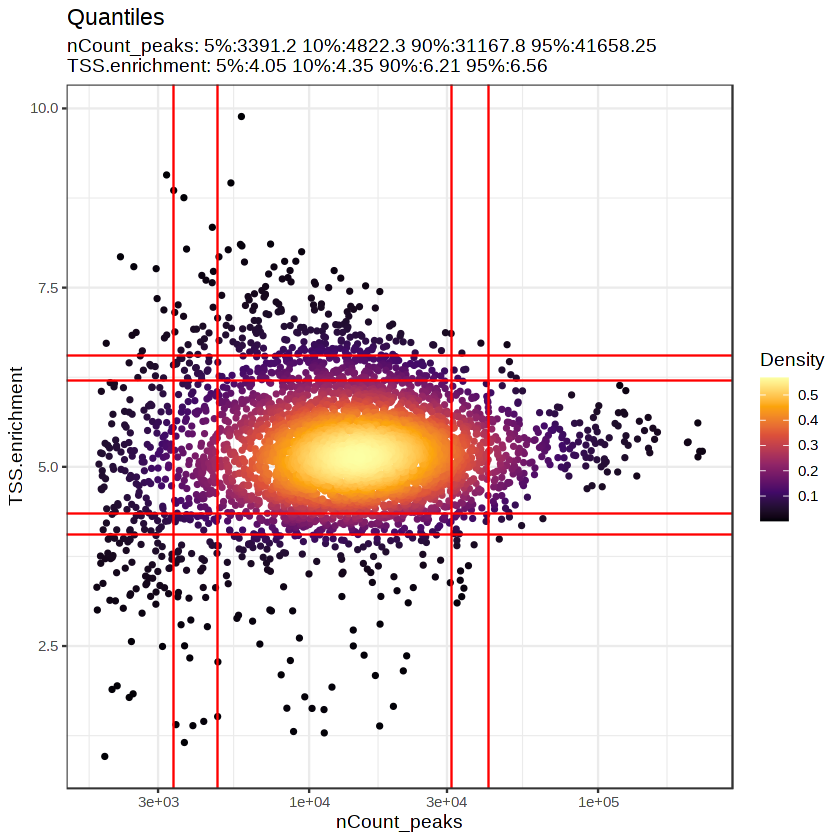

In [12]:
DensityScatter(pbmc, x = 'nCount_peaks', y = 'TSS.enrichment', log_x = TRUE, quantiles = TRUE)

We can plot the distribution of each QC metric separately using a violin plot:

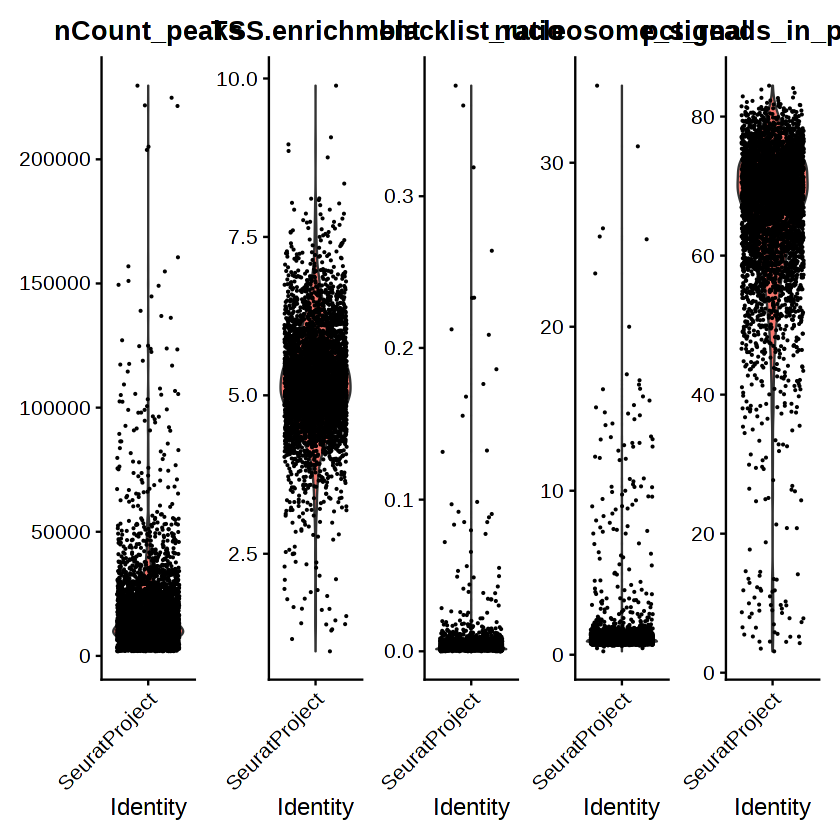

In [13]:
VlnPlot(
  object = pbmc,
  features = c('nCount_peaks', 'TSS.enrichment', 'blacklist_ratio', 'nucleosome_signal', 'pct_reads_in_peaks'),
  pt.size = 0.1,
  ncol = 5
)

Finally we remove cells that are outliers for these QC metrics.

In [14]:
pbmc <- subset(
  x = pbmc,
  subset = nCount_peaks > 3000 &
    nCount_peaks < 30000 &
    pct_reads_in_peaks > 15 &
    blacklist_ratio < 0.05 &
    nucleosome_signal < 4 &
    TSS.enrichment > 3
)
pbmc

An object of class Seurat 
87561 features across 3639 samples within 1 assay 
Active assay: peaks (87561 features, 0 variable features)
 2 layers present: counts, data

Normalization and linear dimensional reduction


*   Normalization: Signac performs term frequency-inverse document frequency (TF-IDF) normalization. This is a two-step normalization procedure, that both normalizes across cells to correct for differences in cellular sequencing depth, and across peaks to give higher values to more rare peaks.
*   Feature selection: The low dynamic range of scATAC-seq data makes it challenging to perform variable feature selection, as we do for scRNA-seq. Instead, we can choose to use only the top n% of features (peaks) for dimensional reduction, or remove features present in less than n cells with the FindTopFeatures() function. Here we will use all features, though we have seen very similar results when using only a subset of features (try setting min.cutoff to ‘q75’ to use the top 25% all peaks), with faster runtimes. Features used for dimensional reduction are automatically set as VariableFeatures() for the Seurat object by this function.
*   Dimension reduction: We next run singular value decomposition (SVD) on the TD-IDF matrix, using the features (peaks) selected above. This returns a reduced dimension representation of the object (for users who are more familiar with scRNA-seq, you can think of this as analogous to the output of PCA).
The combined steps of TF-IDF followed by SVD are known as latent semantic indexing (LSI), and were first introduced for the analysis of scATAC-seq data by Cusanovich et al. 2015.

In [15]:
pbmc <- RunTFIDF(pbmc)
pbmc <- FindTopFeatures(pbmc, min.cutoff = 'q0')
pbmc <- RunSVD(pbmc)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings



The first LSI component often captures sequencing depth (technical variation) rather than biological variation. If this is the case, the component should be removed from downstream analysis. We can assess the correlation between each LSI component and sequencing depth using the DepthCor() function:

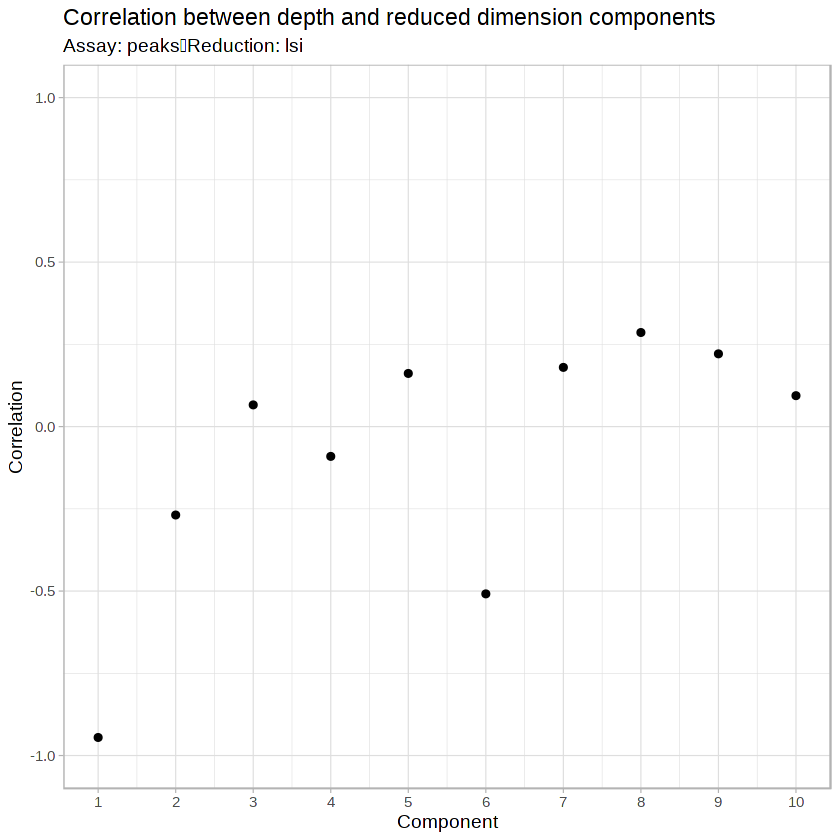

In [16]:
DepthCor(pbmc)

Here we see there is a very strong correlation between the first LSI component and the total number of counts for the cell. We will perform downstream steps without this component as we don’t want to group cells together based on their total sequencing depth, but rather by their patterns of accessibility at cell-type-specific peaks.



Non-linear dimension reduction and clustering

Now that the cells are embedded in a low-dimensional space we can use methods commonly applied for the analysis of scRNA-seq data to perform graph-based clustering and non-linear dimension reduction for visualization. The functions RunUMAP(), FindNeighbors(), and FindClusters() all come from the Seurat package.



Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
16:59:46 UMAP embedding parameters a = 0.9922 b = 1.112

16:59:46 Read 3639 rows and found 29 numeric columns

16:59:46 Using Annoy for neighbor search, n_neighbors = 30

16:59:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:59:46 Writing NN index file to temp file /tmp/RtmpLaa2LD/file87a033f0f282

16:59:46 Searching Annoy index using 1 thread, search_k = 3000

16:59:48 Annoy recall = 100%

16:59:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

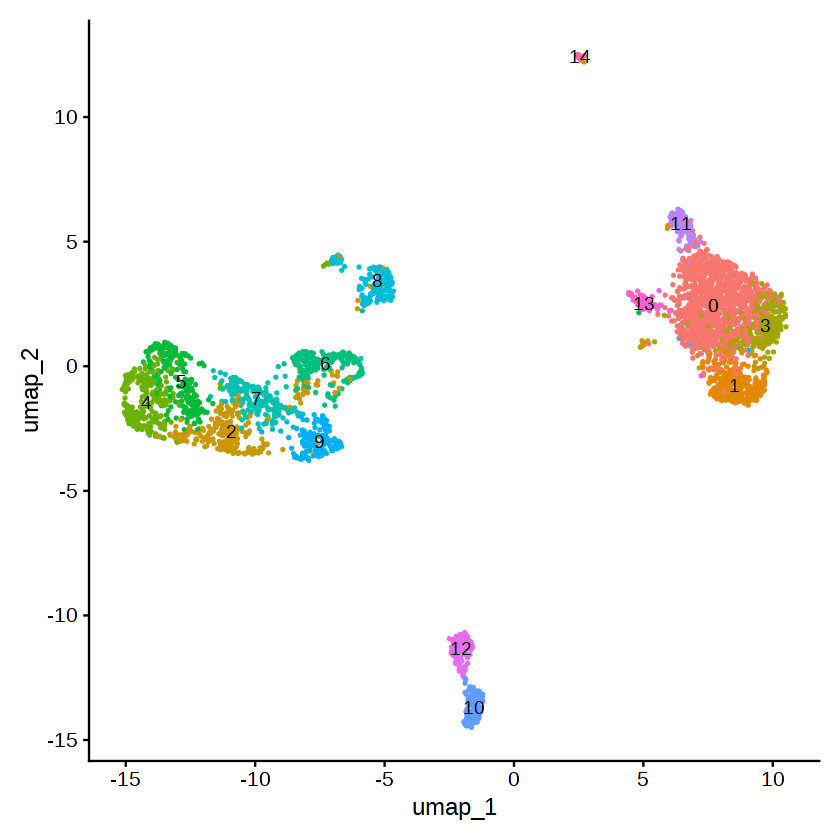

In [17]:
pbmc <- RunUMAP(object = pbmc, reduction = 'lsi', dims = 2:30)
pbmc <- FindNeighbors(object = pbmc, reduction = 'lsi', dims = 2:30)
pbmc <- FindClusters(object = pbmc, verbose = FALSE, algorithm = 3)
DimPlot(object = pbmc, label = TRUE) + NoLegend()

Create a gene activity matrix

The UMAP visualization reveals the presence of multiple cell groups in human blood. If you are familiar with scRNA-seq analyses of PBMC, you may recognize the presence of certain myeloid and lymphoid populations in the scATAC-seq data. However, annotating and interpreting clusters is more challenging in scATAC-seq data as much less is known about the functional roles of noncoding genomic regions than is known about protein coding regions (genes).

We can try to quantify the activity of each gene in the genome by assessing the chromatin accessibility associated with the gene, and create a new gene activity assay derived from the scATAC-seq data. Here we will use a simple approach of summing the fragments intersecting the gene body and promoter region (we also recommend exploring the Cicero tool, which can accomplish a similar goal, and we provide a vignette showing how to run Cicero within a Signac workflow here).

To create a gene activity matrix, we extract gene coordinates and extend them to include the 2 kb upstream region (as promoter accessibility is often correlated with gene expression). We then count the number of fragments for each cell that map to each of these regions, using the using the FeatureMatrix() function. These steps are automatically performed by the GeneActivity() function:

In [18]:
gene.activities <- GeneActivity(pbmc)
# add the gene activity matrix to the Seurat object as a new assay and normalize it
pbmc[['GeneActivity']] <- CreateAssayObject(counts = gene.activities)
pbmc <- NormalizeData(
  object = pbmc,
  assay = 'GeneActivity',
  normalization.method = 'LogNormalize',
  scale.factor = median(pbmc$nCount_GeneActivity)
)

Extracting gene coordinates

Extracting reads overlapping genomic regions

Warning message:
"Non-unique features (rownames) present in the input matrix, making unique"


Now we can visualize the activities of canonical marker genes to help interpret our ATAC-seq clusters. Note that the activities will be much noisier than scRNA-seq measurements. This is because they represent measurements from sparse chromatin data, and because they assume a general correspondence between gene body/promoter accessibility and gene expression which may not always be the case. Nonetheless, we can begin to discern populations of monocytes, B, T, and NK cells based on these gene activity profiles. However, further subdivision of these cell types is challenging based on supervised analysis alone.

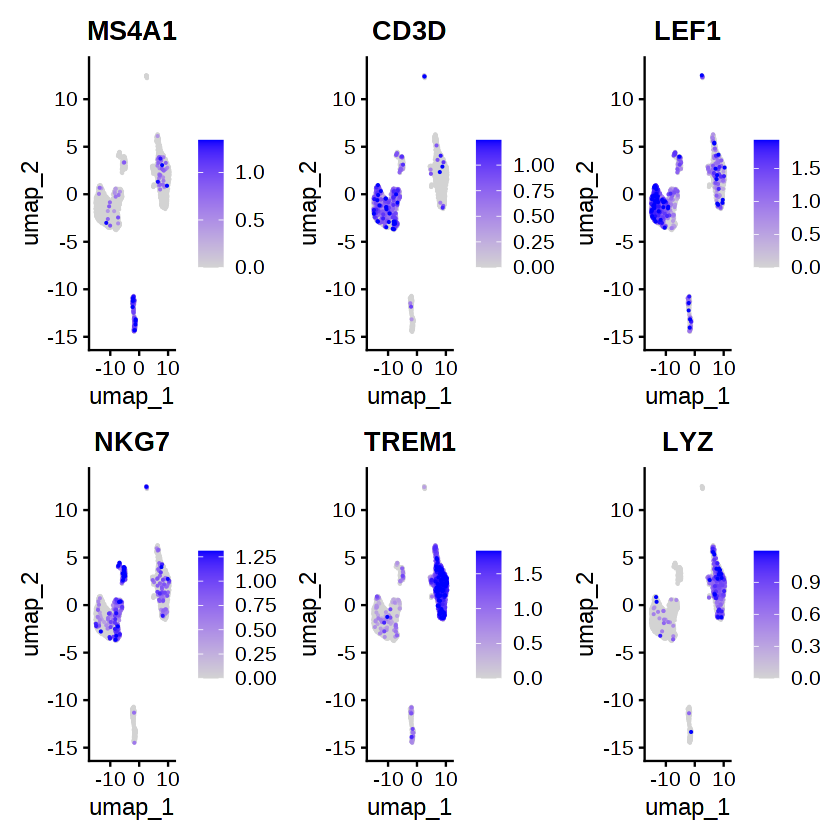

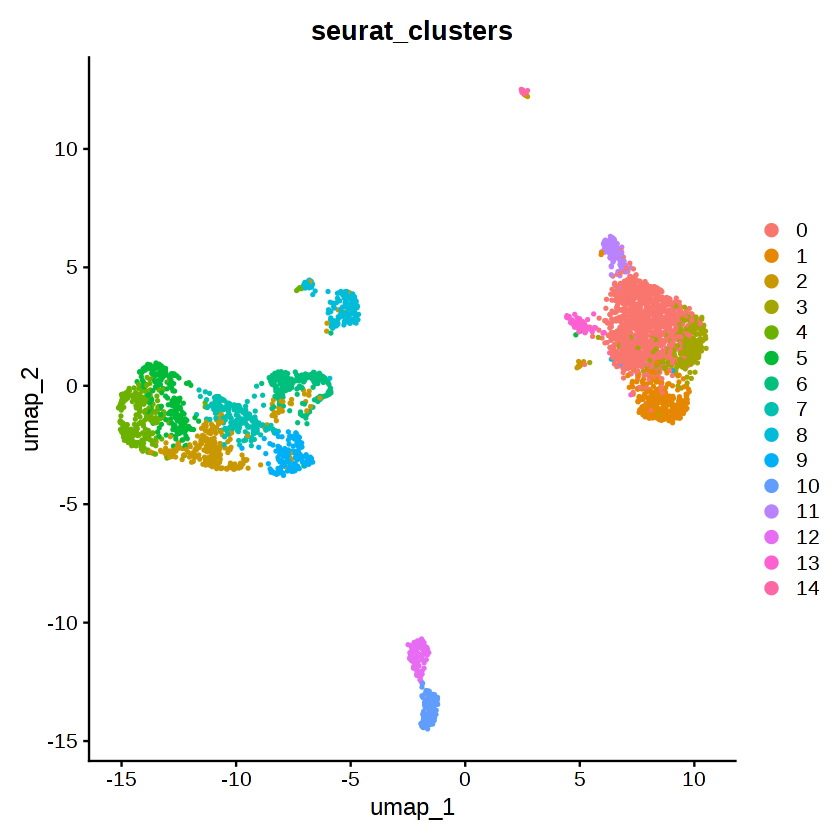

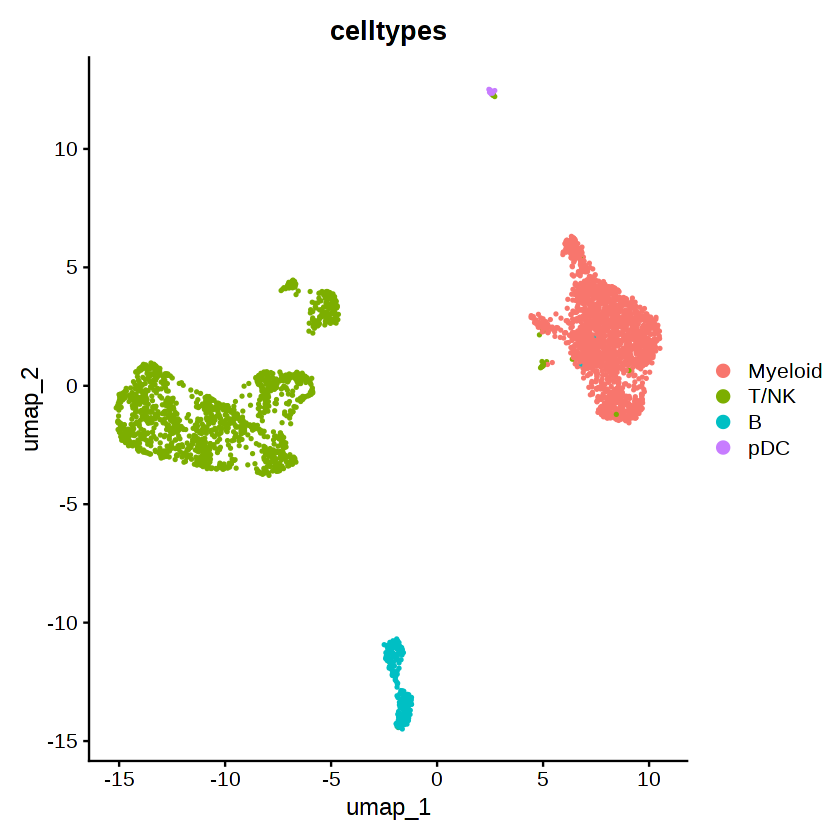

In [19]:
DefaultAssay(pbmc) <- 'GeneActivity'

FeaturePlot(
  object = pbmc,
  features = c('MS4A1', 'CD3D', 'LEF1', 'NKG7', 'TREM1', 'LYZ'),
  pt.size = 0.1,
  max.cutoff = 'q95',
  ncol = 3,
  order = TRUE
)

pbmc$celltypes <- factor(
  pbmc$seurat_clusters,
  levels = as.character(0:14),
  labels = c("Myeloid", "Myeloid", "T/NK", "Myeloid", "T/NK", "T/NK", "T/NK", "T/NK", "T/NK", "T/NK", "B", "Myeloid", "B", "Myeloid", "pDC")
)

DimPlot(pbmc, group.by = "seurat_clusters")
DimPlot(pbmc, group.by = "celltypes")


Find differentially accessible peaks between cell types

To find differentially accessible regions between clusters of cells, we can perform a differential accessibility (DA) test. A simple approach is to perform a Wilcoxon rank sum test, and the presto package has implemented an extremely fast Wilcoxon test that can be run on a Seurat object.

Another approach for differential testing is to utilize logistic regression for, as suggested by Ntranos et al. 2018 for scRNA-seq data, and add the total number of fragments as a latent variable to mitigate the effect of differential sequencing depth on the result. Here we will focus on comparing Naive CD4 cells and CD14 monocytes, but any groups of cells can be compared using these methods. We can also visualize these marker peaks on a violin plot, feature plot, dot plot, heat map, or any visualization tool in Seurat.

In [20]:
DefaultAssay(pbmc) <- 'peaks'

da_peaks <- FindMarkers(
  object = pbmc,
  ident.1 = "T/NK",
  ident.2 = "Myeloid",
  group.by = "celltypes",
  test.use = 'LR',
  logfc.threshold = 1,
  min.pct = 0.25,
  latent.vars = 'nCount_peaks'
)
head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr14-99721608-99741934,0.000000e+00,5.214376,0.740,0.022,0.000000e+00
chr2-113581628-113594911,0.000000e+00,-5.170632,0.032,0.659,0.000000e+00
chr20-48889794-48893313,0.000000e+00,-4.936927,0.030,0.600,0.000000e+00
chr6-44025105-44028184,1.299188e-317,-4.336114,0.041,0.611,1.137582e-312
chr14-23012859-23028219,1.805759e-312,3.107594,0.782,0.130,1.581140e-307
chr9-137263243-137268534,9.869543e-311,-4.568716,0.036,0.586,8.641870e-306


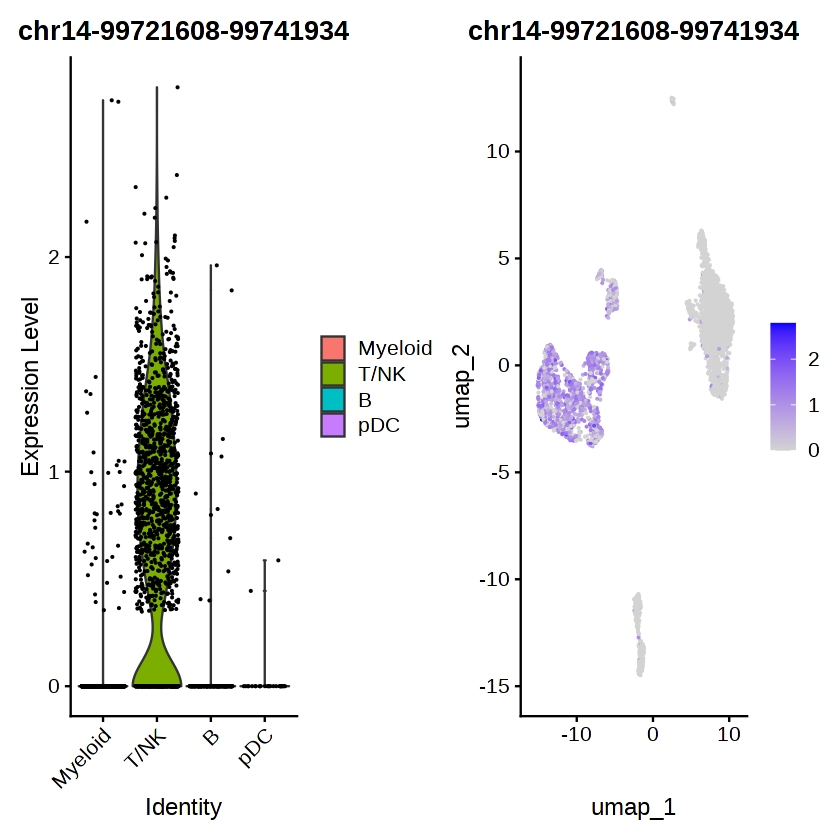

In [21]:
plot1 <- VlnPlot(
  object = pbmc,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  group.by = "celltypes"
)
plot2 <- FeaturePlot(
  object = pbmc,
  features = rownames(da_peaks)[1],
  pt.size = 0.1
)

plot1 | plot2

Another way to find DA regions between two groups of cells is to look at the fold change accessibility between two groups of cells. This can be much faster than running more sophisticated DA tests, but is not able to account for latent variables such as differences in the total sequencing depth between cells, and does not perform any statistical test. However, this can still be a useful way to quickly explore data, and can be performed using the FoldChange() function in Seurat.

In [22]:
fc <- FoldChange(pbmc, ident.1 = "T/NK", ident.2 = "Myeloid", group.by = "celltypes")
# order by fold change
fc <- fc[order(fc$avg_log2FC, decreasing = TRUE), ]
head(fc)

,avg_log2FC,pct.1,pct.2
,<dbl>,<dbl>,<dbl>
chr10-76348806-76349574,11.76852,0.153,0
chr22-40305730-40307371,11.45124,0.111,0
chr1-62248240-62248862,11.17945,0.079,0
chr3-58020432-58021306,11.12904,0.080,0
chr15-93356515-93357394,11.08695,0.075,0
chr17-80805747-80806413,11.05592,0.071,0


Peak coordinates can be difficult to interpret alone. We can find the closest gene to each of these peaks using the ClosestFeature() function. If you explore the gene lists, you will see that peaks open in Naive T cells are close to genes such as BCL11B and GATA3 (key regulators of T cell differentiation ), while peaks open in monocytes are close to genes such as CEBPB (a key regulator of monocyte differentiation). We could follow up this result further by doing gene ontology enrichment analysis on the gene sets returned by ClosestFeature(), and there are many R packages that can do this (see the GOstats package for example).

In [23]:
open_tnk <- rownames(da_peaks[da_peaks$avg_log2FC > 3, ])
open_myeloid <- rownames(da_peaks[da_peaks$avg_log2FC < -3, ])

closest_genes_tnk <- ClosestFeature(pbmc, regions = open_tnk)
closest_genes_myeloid <- ClosestFeature(pbmc, regions = open_myeloid)



In [24]:
head(closest_genes_tnk)

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENST00000443726,ENST00000443726,BCL11B,ENSG00000127152,protein_coding,cds,chr14-99737498-99737555,chr14-99721608-99741934,0
ENST00000557595,ENST00000557595,AE000662.92,ENSG00000259003,protein_coding,cds,chr14-23027629-23027664,chr14-23012859-23028219,0
ENSE00002456092,ENST00000463701,PRSS1,ENSG00000204983,protein_coding,exon,chr7-142460719-142460923,chr7-142501666-142511108,40742
ENST00000357195,ENST00000357195,BCL11B,ENSG00000127152,protein_coding,cds,chr14-99697682-99697894,chr14-99695477-99720910,0
ENST00000379328,ENST00000379328,GATA3,ENSG00000107485,protein_coding,cds,chr10-8100268-8100804,chr10-8083940-8104354,0
ENST00000546420,ENST00000546420,CCDC64,ENSG00000135127,protein_coding,cds,chr12-120427684-120428101,chr12-120426014-120428613,0


In [25]:
head(closest_genes_myeloid)

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENST00000432018,ENST00000432018,IL1B,ENSG00000125538,protein_coding,cds,chr2-113593760-113593806,chr2-113581628-113594911,0
ENST00000445003,ENST00000445003,RP11-290F20.3,ENSG00000224397,lincRNA,gap,chr20-48884201-48894027,chr20-48889794-48893313,0
ENSE00001638912,ENST00000455005,RP5-1120P11.3,ENSG00000231881,lincRNA,exon,chr6-44041650-44042535,chr6-44025105-44028184,13465
ENST00000484822,ENST00000484822,RXRA,ENSG00000186350,protein_coding,gap,chr9-137211331-137293477,chr9-137263243-137268534,0
ENST00000409245,ENST00000409245,TTC7A,ENSG00000068724,protein_coding,cds,chr2-47300841-47301062,chr2-47297968-47301173,0
ENST00000608654,ENST00000608654,LINC00877,ENSG00000241163,lincRNA,gap,chr3-72149162-72149938,chr3-72144191-72152092,0


Plotting genomic regions

We can plot the frequency of Tn5 integration across regions of the genome for cells grouped by cluster, cell type, or any other metadata stored in the object for any genomic region using the CoveragePlot() function. These represent pseudo-bulk accessibility tracks, where signal from all cells within a group have been averaged together to visualize the DNA accessibility in a region (thanks to Andrew Hill for giving the inspiration for this function in his excellent blog post). Alongside these accessibility tracks we can visualize other important information including gene annotation, peak coordinates, and genomic links (if they’re stored in the object). See the visualization vignette for more information.

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_segment()`)."


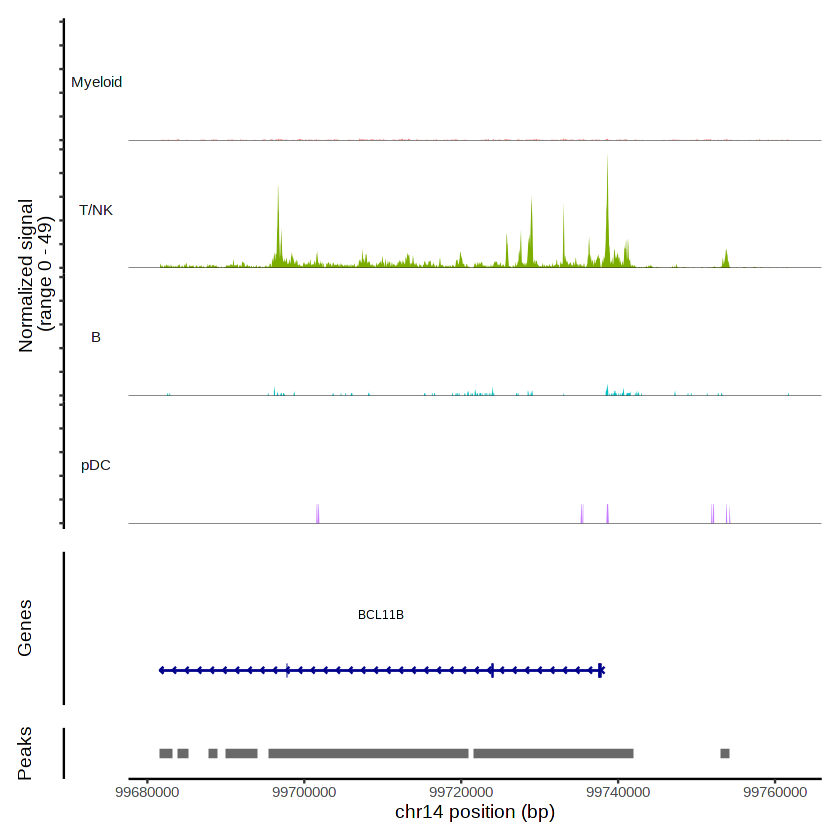

In [26]:
# set plotting order

CoveragePlot(
  object = pbmc,
  region = rownames(da_peaks)[1],
  group.by = "celltypes",
  extend.upstream = 40000,
  extend.downstream = 20000
)

We will perform DNA sequence motif analysis in Signac. We will explore a pipeline based on the chromVAR package: performing differential motif activity analysis between groups of cells. Through chromVAR, we can compute a per-cell motif activity score. This allows us to visualize motif activities per cell, and also provides a method of identifying differentially-active motifs between cell types.

ChromVAR identifies motifs associated with variability in chromatin accessibility between cells. See the chromVAR paper for a complete description of the method.

In [27]:
# Get a list of motif position frequency matrices from the JASPAR database
pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

# add motif information
pbmc <- AddMotifs(
  object = pbmc,
  genome = BSgenome.Hsapiens.UCSC.hg19,
  pfm = pfm
)

Building motif matrix

Finding motif positions

Creating Motif object



Running chromVAR will take a little while - as you have time, go to https://www.nature.com/articles/nmeth.4401 and take a look at how the algorithm itself works!

In [ ]:
pbmc <- RunChromVAR(
  object = pbmc,
  genome = BSgenome.Hsapiens.UCSC.hg19
)

DefaultAssay(pbmc) <- 'chromvar'


Computing GC bias per region

Selecting background regions

Computing deviations from background



We can also directly test for differential activity scores between cell types. When performing differential testing on the chromVAR z-score, we can set mean.fxn=rowMeans and fc.name="avg_diff" in the FindMarkers() function so that the fold-change calculation computes the average difference in z-score between the groups.

In [ ]:
differential.activity <- FindMarkers(
  object = pbmc,
  ident.1 = 'T/NK',
  group.by = "celltypes",
  assay = "chromvar",
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff"
)
head(differential.activity)
p1 <- DimPlot(
  object = pbmc,
  group.by = "celltypes",
  label = TRUE
)
p2 <- FeaturePlot(
  object = pbmc,
  features = rownames(differential.activity)[1],
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.1
)
p1 + p2